In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'Analytics Case Study Dataset - Bazaar Launchpad 2023.csv')

#### HOW DATA LOOKS LIKE

In [3]:
df.head()

,dispatch_date,order_date,city,town,uc,delivery_warehouse,delivered_by,store_id,shaheen_id,tour_number,...,item_discount,net_gmv,gross_nmv,adjustment_amount,ordered_quantity,delivered_quantity,returned_quantity,out_of_stock_quantity,adjustment_reason,simplified_return_reason
0,8/1/2022,7/30/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,10,2860,0,0,2,0,2,0,NaN,Customer Issue
1,8/1/2022,7/31/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,0,1764,1764,0,3,3,0,0,NaN,NaN
2,8/1/2022,7/31/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,0,1368,1368,0,3,3,0,0,NaN,NaN
3,8/1/2022,7/30/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,0,2352,0,0,4,0,4,0,NaN,Customer Issue
4,8/1/2022,7/29/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,3,1136,1160,0,8,8,0,0,NaN,NaN


#### SOME INFO ABOUT THE CURRENT DATA

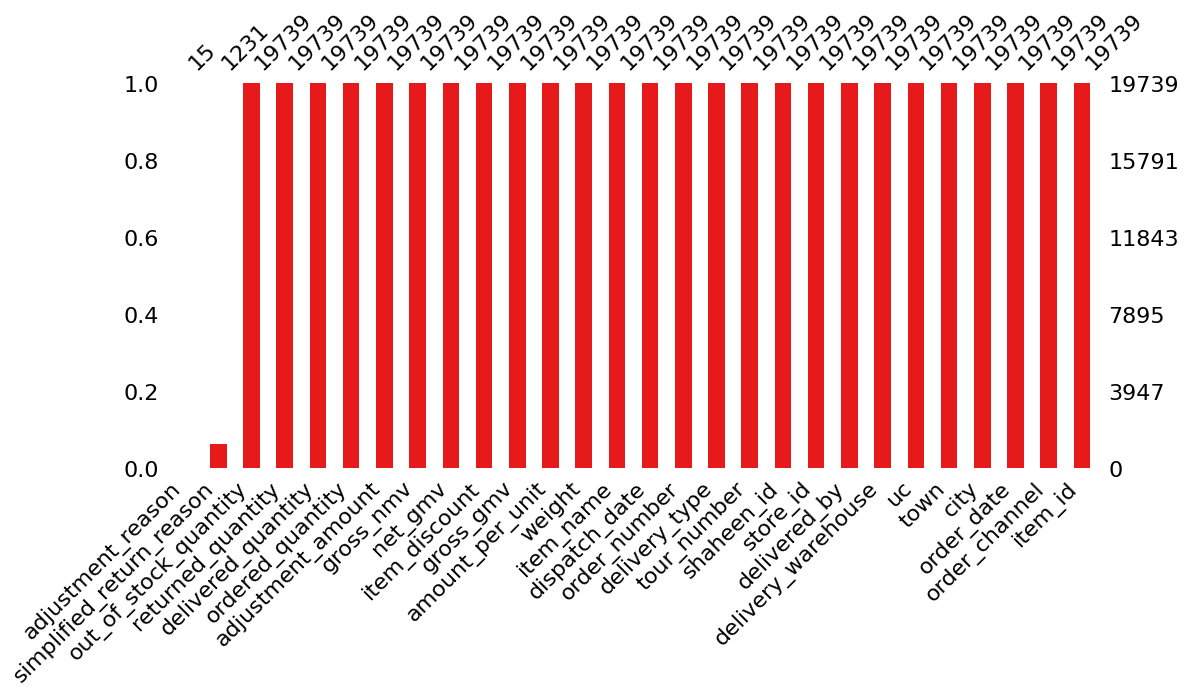

In [4]:
import missingno as msno

msno.bar(df, figsize=(12, 5), sort='ascending', color=(0.9, 0.1, 0.1))
plt.show()

In [5]:
df.describe()

,item_id,weight,amount_per_unit,gross_gmv,item_discount,net_gmv,gross_nmv,adjustment_amount,ordered_quantity,delivered_quantity,returned_quantity,out_of_stock_quantity
count,1.973900e+04,19739.000000,19739.000000,1.973900e+04,19739.000000,19739.000000,1.973900e+04,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000
mean,4.109656e+17,2.619082,741.017427,1.601842e+03,0.815340,1594.106692,1.507530e+03,0.666346,3.250671,3.077664,0.171032,0.001976
std,3.179919e+17,4.290583,1274.711105,8.414398e+03,5.301192,7993.724741,8.158867e+03,28.740021,7.231791,7.067169,1.664398,0.105316
min,5.271640e+12,0.003000,19.000000,1.900000e+01,0.000000,19.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.316550e+16,0.220000,109.000000,2.120000e+02,0.000000,212.000000,1.690000e+02,0.000000,1.000000,1.000000,0.000000,0.000000
50%,3.798590e+17,0.375000,183.000000,5.700000e+02,0.000000,565.000000,5.070000e+02,0.000000,2.000000,2.000000,0.000000,0.000000
75%,6.845830e+17,4.800000,860.000000,1.710000e+03,0.000000,1710.000000,1.620000e+03,0.000000,3.000000,3.000000,0.000000,0.000000
max,9.999050e+17,50.000000,8920.000000,1.007500e+06,450.000000,937750.000000,1.007500e+06,2700.000000,455.000000,450.000000,100.000000,12.000000


In [6]:
df.drop(columns=['order_number', 'item_id'], inplace=True)

In [7]:
df.columns

Index(['dispatch_date', 'order_date', 'city', 'town', 'uc',
       'delivery_warehouse', 'delivered_by', 'store_id', 'shaheen_id',
       'tour_number', 'delivery_type', 'order_channel', 'item_name', 'weight',
       'amount_per_unit', 'gross_gmv', 'item_discount', 'net_gmv', 'gross_nmv',
       'adjustment_amount', 'ordered_quantity', 'delivered_quantity',
       'returned_quantity', 'out_of_stock_quantity', 'adjustment_reason',
       'simplified_return_reason'],
      dtype='object')

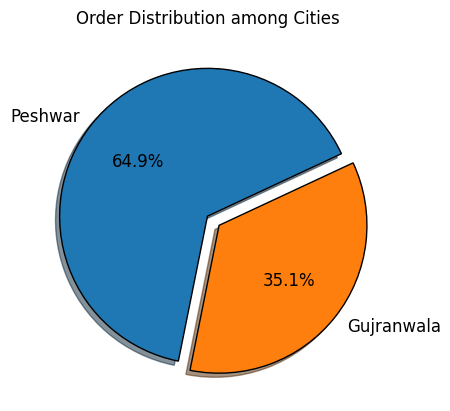

In [8]:
plt.pie(df['city'].value_counts(), labels=['Peshwar', 'Gujranwala'], autopct='%1.1f%%', explode=(0, 0.1), shadow=True, startangle=25, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Order Distribution among Cities')
plt.show()

In [9]:
df['Ret/Not Ret'] = df['returned_quantity'].apply(lambda x: 'Returned' if x >= 1 else 'Not Returned')

In [10]:
all_data = df['Ret/Not Ret'].value_counts()
data_P = df.loc[df['city'] == 'Peshawar', 'Ret/Not Ret'].value_counts()
data_G = df.loc[df['city'] == 'Gujranwala', 'Ret/Not Ret'].value_counts()

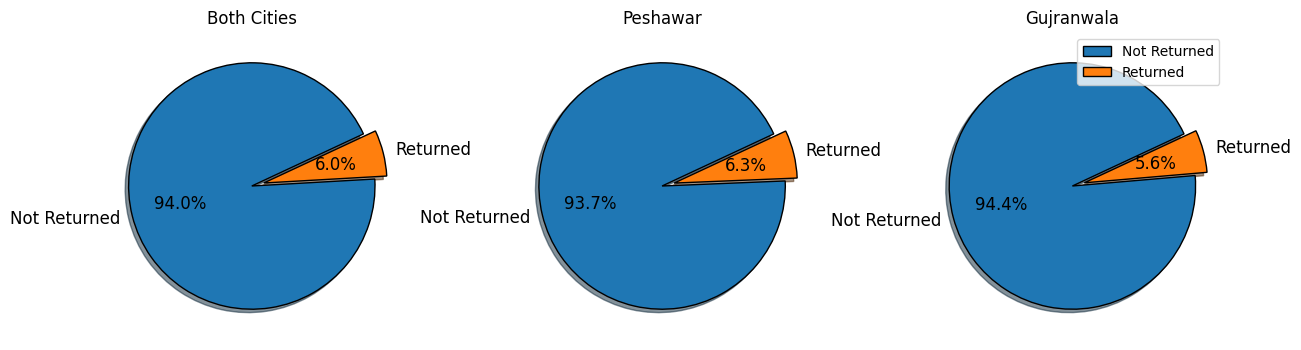

In [11]:
plt.figure(figsize=(15, 4))
i=0
ds = [all_data, data_P, data_G]
titles = ['Both Cities', 'Peshawar', 'Gujranwala']
for data, i , title in zip(ds, range(len(ds)), titles):
    plt.subplot(1, 3,i+1)
    plt.pie(data, labels=data.index.tolist(), autopct='%1.1f%%', explode=(0, 0.1), shadow=True, startangle=25, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
    plt.title(title)
plt.legend(loc='upper right')
plt.show()

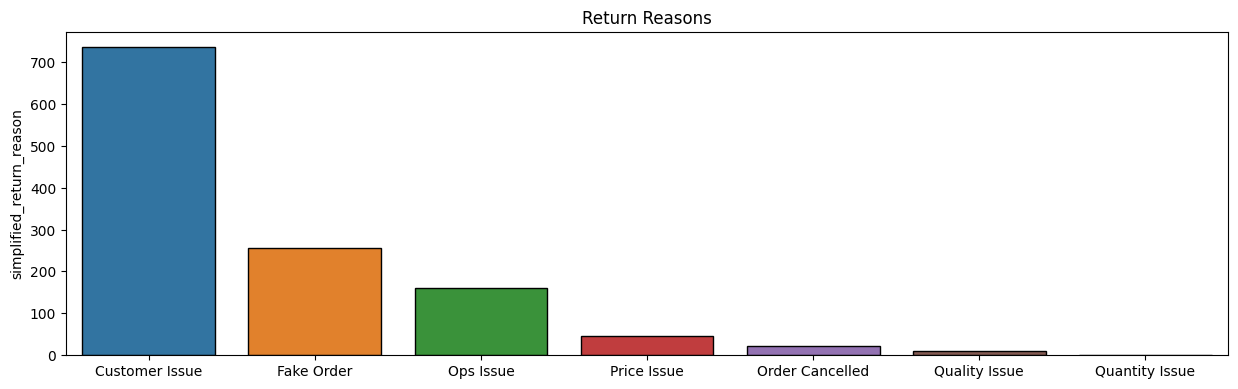

In [12]:
plt.figure(figsize=(15, 4.2))
sns.barplot(data = df, y = df['simplified_return_reason'].value_counts(), x = df['simplified_return_reason'].value_counts().index.tolist(), linewidth=1, edgecolor='black')
plt.title('Return Reasons')
plt.show()

In [13]:
df.select_dtypes(include=['int64']).columns

Index(['amount_per_unit', 'gross_gmv', 'item_discount', 'net_gmv', 'gross_nmv',
       'adjustment_amount', 'ordered_quantity', 'delivered_quantity',
       'returned_quantity', 'out_of_stock_quantity'],
      dtype='object')

In [14]:
# explain losses occuring due to returns

In [15]:
data_P = df[df['city'] == 'Peshawar']
data_G = df[df['city'] == 'Gujranwala']

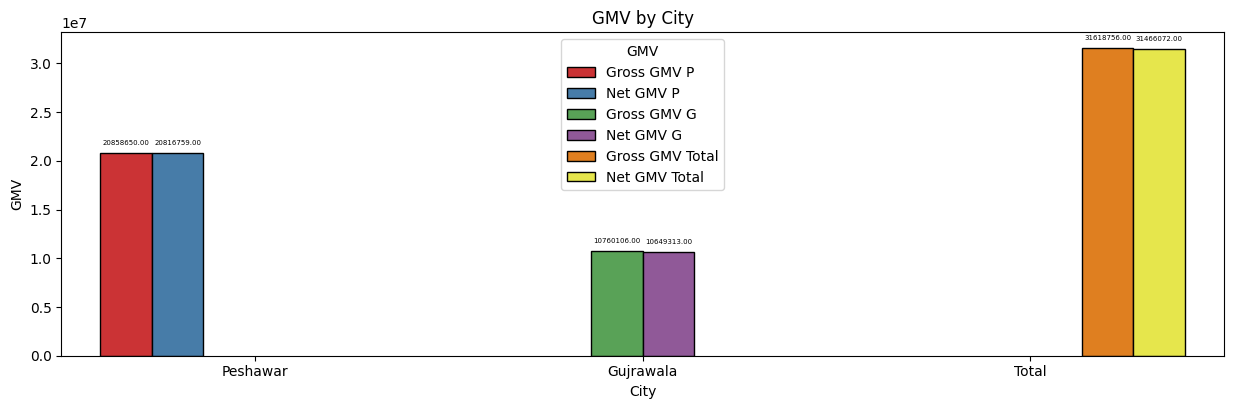

In [33]:
plt.figure(figsize=(15, 4.2))
df = pd.DataFrame({
    'GMV': ['Gross GMV P', 'Net GMV P', 'Gross GMV G', 'Net GMV G', 'Gross GMV Total', 'Net GMV Total'],
    'Value': [
        data_P['gross_gmv'].sum(),
        data_P['net_gmv'].sum(),
        data_G['gross_gmv'].sum(),
        data_G['net_gmv'].sum(),
        data_P['gross_gmv'].sum() + data_G['gross_gmv'].sum(),
        data_P['net_gmv'].sum() + data_G['net_gmv'].sum()
    ],
    'Category': ['Peshawar', 'Peshawar', 'Gujrawala', 'Gujrawala', 'Total', 'Total']
})

ax = sns.barplot(x='Category', y='Value', hue='GMV', data=df, linewidth=1, edgecolor='black', palette='Set1')
for container in ax.containers:
    ax.bar_label(container, padding=5, fontsize=5, fmt='%.2f')

plt.xlabel('City')
plt.ylabel('GMV')
plt.title('GMV by City')
plt.show()


TypeError: unhashable type: 'numpy.ndarray'

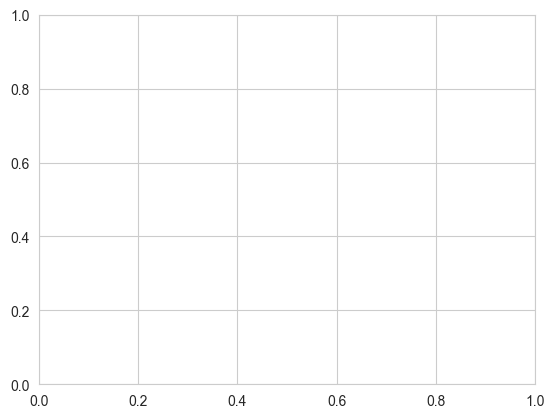

In [84]:
# sns.barplot(x="city", y="gross_gmv", data=df, color="blue", label="Gross GMV")
# # sns.barplot(x="city", y="net_gmv", data=df, color="red", label="Net GMV")
# # sns.barplot(x="city", y=df['gross_gmv'] - df['net_gmv'], data=df, color="orange", label="Losses")
# plt.show()


plt.bar(df, 'gross_gmv', color='blue', edgecolor='white', label='Gross GMV')
plt.bar(df, 'net_gmv', color='red', edgecolor='white', label='Net GMV')

# Add x-axis labels and title
plt.xlabel('City')
plt.ylabel('GMV')
plt.title('Gross GMV and Net GMV of Cities')

# Add a legend
plt.legend()

# Show the graph
plt.show()


In [ ]:
data = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['simplified_return_reason'] = le.fit_transform(data['simplified_return_reason'])

In [ ]:
data['simplified_return_reason'].value_counts()

In [ ]:
import re
pattern = r"\d+\.\d+\s*(?:ml|L|Litre|\s*[Ll])"
lst = list()
for s in df['item_name']:
    if re.search(pattern, s):
        lst.append(re.search(pattern, s).group())


In [ ]:
lst = pd.DataFrame(lst, columns=['volume'])

In [ ]:
lst.value_counts()